<a href="https://colab.research.google.com/github/Sj-20/stock-price-prediction/blob/main/Fb_stock_price_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import necessary libraries

In [ ]:
import math

In [ ]:
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential 
from keras.layers import Dense, LSTM


In [ ]:
import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')

Getting the stock quote and showing the data

In [ ]:
df= web.DataReader('FB',data_source='yahoo',start='2012-01-01',end='2020-12-12')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-05-18,45.000000,38.000000,42.049999,38.230000,573576400,38.230000
2012-05-21,36.660000,33.000000,36.529999,34.029999,168192700,34.029999
2012-05-22,33.590000,30.940001,32.610001,31.000000,101786600,31.000000
2012-05-23,32.500000,31.360001,31.370001,32.000000,73600000,32.000000
2012-05-24,33.209999,31.770000,32.950001,33.029999,50237200,33.029999
...,...,...,...,...,...,...
2020-12-07,288.489990,278.200012,279.190002,285.579987,13007700,285.579987
2020-12-08,286.429993,281.549988,286.010010,283.399994,10747700,283.399994
2020-12-09,287.630005,271.750000,283.660004,277.920013,25189700,277.920013


Getting number of rows and columns in dataset

In [ ]:
df.shape


(2157, 6)

Visualize closing price history

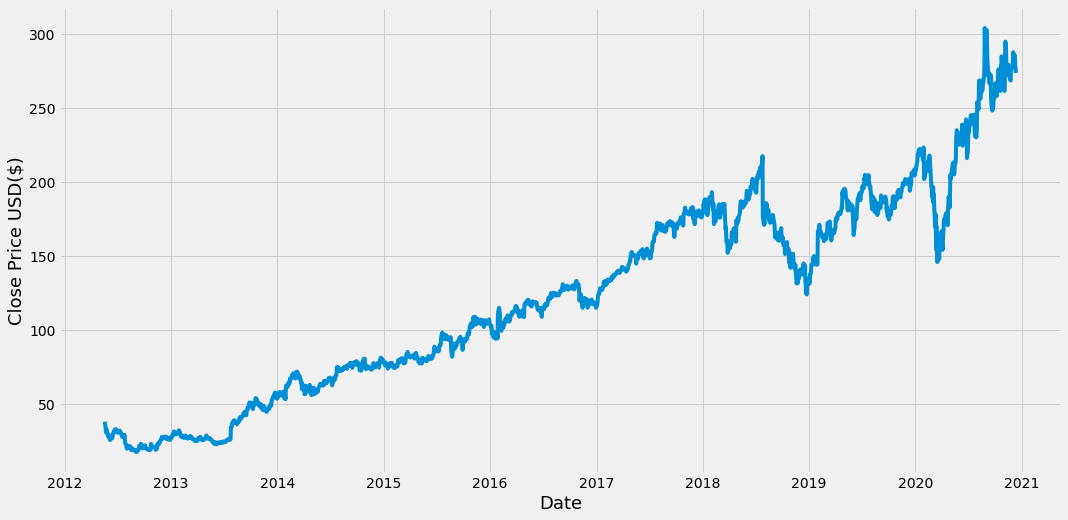

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD($)',fontsize=18)
plt.show()

Create new dataframe with only 'Close column'


In [ ]:
data=df.filter(['Close'])

Convert the dataframe to a numpy array



In [ ]:
ds=data.values

Getting number of rows to train the model on

In [ ]:
training_data_len= math.ceil (len(ds) * .8)
training_data_len

1726

Scale or normalize the data

In [ ]:
sclr=MinMaxScaler(feature_range=(0,1))
scaled_data=sclr.fit_transform(ds)
scaled_data

array([[0.07163324],
       [0.05695716],
       [0.04636942],
       ...,
       [0.90918307],
       [0.90638756],
       [0.89391287]])

Create training dataset
Split the data into x_train and y_train

In [ ]:
train_data=scaled_data[0:training_data_len,:]
x_train=[]
y_train=[]

for i in range (60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=61:
    print(x_train)
    print(y_train)
    print()

Convert x_train and y_train into numpy arrays

In [ ]:
x_train,y_train=np.array(x_train),np.array(y_train)

Reshape the data

In [ ]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

Building LSTM model

In [ ]:
stckmodel=Sequential()
stckmodel.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
stckmodel.add(LSTM(50,return_sequences=False))
stckmodel.add(Dense(25))
stckmodel.add(Dense(1))

Compile the model

In [ ]:
stckmodel.compile(optimizer='adam',loss='mean_squared_error')

Training the model

In [ ]:
stckmodel.fit(x_train,y_train,batch_size=1,epochs=1)

Creating testing dataset
\\Creating a new array containing normalized values from index 1666 to 2003




In [ ]:
test_data=scaled_data[training_data_len -60:,:]
#Creating the datasets x_test and y_test
x_test=[]
y_test=ds[training_data_len:,:]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])

Converting the data into numpy array

In [ ]:
x_test=np.array(x_test)

Reshaping the data

In [ ]:
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

Getting the models predicted price values

In [ ]:
pred=stckmodel.predict(x_test)
pred=sclr.inverse_transform(pred)

Getting the RMSE(root mean square error)

In [ ]:
rmse = np.sqrt(((pred - y_test) ** 2).mean())
rmse

8.639257460759273

Plotting the data

In [ ]:
train=data[:training_data_len]
valid=data[training_data_len:]
valid['pred']=pred
#Visualizing the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','pred']])
plt.legend(['Train','Val','Pred'],loc='lower right')
plt.show

Showing the actual and predicted prices

In [ ]:
valid

Getting the quote

In [ ]:
df=web.DataReader('FB',data_source='yahoo',start='2012-01-01',end='2020-12-12')
#creating new dataframe
df1=df.filter(['Close'])
#Getting last 60days closing price value and convert the dataframe into an array
last_60=df1[-60:].values
#normalizing the data to be values between 0 and 1
last_60_norm=sclr.transform(last_60)
#creating empty list
X_test=[]
#Appending past 60 days
X_test.append(last_60_norm)
#Convert X_test dataset to numpy array
X_test=np.array(X_test)
#Reshaping the data
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
#Getting the predicted normalized price
pred_price=stckmodel.predict(X_test)
#Undo scaling
pred_price=sclr.inverse_transform(pred_price)
print(pred_price)

[[276.8357]]
